# Linear Regression  
#### 1.Model:  
>$h_w(x^i)=w_0+w_1x_1+\cdots+w_nx_n$

>$\hat{y}=w^Tx_i=W^TX$

$W^T=\begin{bmatrix}{w_0}&{w_1}&{\cdots}&{w_n}\\ \end{bmatrix}$

$X=\begin{bmatrix}
{1}&{x_1^1}&{x_2^1}&{\cdots}&{x_n^1}\\
{1}&{x_1^2}&{x_2^2}&{\cdots}&{x_n^2}\\
{\vdots}& ;{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{1}&{x_1^n}&{x_2^n}&{\cdots}&{x_n^n}\\
\end{bmatrix}$
$XW=h_w(x^i)$

#### 2. Loss function:
$J_{(w)}=\frac{1} {2M}\sum_{i=1}^m(h_w(x^i)-y^i)^2$

- the normal equation(close-form solution) : $w=(X^TX)^{-1}X^Ty$
- ##### gradient descent:
$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$
The gradient containing all partial derivatives can then be computed as follows:

$\nabla_{\boldsymbol{w}} J = \frac{1}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$ ,  $\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$


## Optimization:
- Adagrad
- Nesterov Momentum
- Adam

#### Adagrad:
(need large learning rate)

$\theta_{t+1,i}=\theta_{t,i}-\frac {\eta} {\sqrt{G_{t,ii}+\epsilon}} g_{t,i}$ ,  $G_{t,ii}\in \mathbb{R}^{d*d}$ is a diagonal matrix where each diagonal element i,i is the sum of the squares of the gradients w.r.t. $\theta_i$ up to time step t,$\epsilon$ usually on the order of $10^{-8}$ $ g_{t,i} = \nabla_{\boldsymbol{\theta}} J(\theta_i)$
#### Nesterov Momentum:  
$v_t= \gamma v_t+ \eta \nabla_{\boldsymbol{\theta}}J(\theta -\gamma v_{t-1}) $  
$\theta = \theta - v_t$
 
#### Adam:  
$ m_t=\beta_1 m_{t-1}+(1-\beta_1)g_t $  
$ v_t=\beta_2 v_{t-1}+(1-\beta_2)g_t^2 $  
$ \hat{m}_t = \frac {m_t} {1-\beta_1^t} $    
$ \hat{v}_t = \frac {v_t} {1-\beta_2^t} $  
$ \theta_{t+1} = \theta_t -\frac {\eta} {\sqrt{v_t +\epsilon}} \hat{m}_t $
 
#### 3. Data:
predict PM 2.5

> [train.csv](https://github.com/liddalidd/ML_basic/blob/master/ML%20by%20Hungyi%20Lee/Linear_Regression/train.csv)  
> [test.csv](https://github.com/liddalidd/ML_basic/blob/master/ML%20by%20Hungyi%20Lee/Linear_Regression/test.csv)

In [2]:
import pandas as pd

import numpy as np
from pandas import DataFrame 
import matplotlib.pyplot as plt


train=pd.read_csv("train.csv");
# pm=train[train[""]]
pm=train[train["testmaterial"]=="PM2.5"]#find all PM2.5 data no.240
pm.drop(['date','station','testmaterial'],axis=1,inplace=True)
x=[] 
y=[]
for i in range(15): 
    temx=pm.iloc[:,i:i+9]
    temx.columns=np.array(range(9))
    temy=pm.iloc[:,i+9]
    temy.columns=np.array(range(1))
    x.append(temx)
    y.append(temy)


x=pd.concat(x)#3600x9,3600=240x15, x:dataframe
y=pd.concat(y)#3600x1 ,y:serise
x=np.array(x,float)
y=np.array(y,float)
np.save("x.npy",x)
np.save("y.npy",y)

D:\Software\Anaconda\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [3]:
x=np.load("x.npy")
y=np.load("y.npy")
#adding baias
x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)#x.shape 3600*10

m=x.shape[0]

75.0848837986519


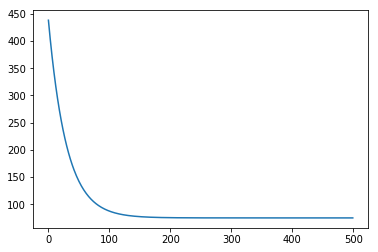

In [5]:

# Gradient Descent 
 

l_rate = 0.0000003
repeat = 500

costs_gd=[] 
w_gd = np.zeros(len(x[0])) 

for i in range(repeat):
    y_pred=np.dot(x,w_gd)
    
    cost=(1/(2*m))*np.sum(((y_pred-y)**2))
    costs_gd.append(cost)
    d_w=(1/m)*np.sum(np.dot(x.T,(y_pred-y))) 
    w_gd=w_gd-l_rate*d_w 
 
np.save("model.npy",w_gd)
print(costs_gd[-1])
plt.plot(np.arange(repeat), costs_gd)   

#### Adagrad: 
 
$\theta_{t+1,i}=\theta_{t,i}-\frac {\eta} {\sqrt{G_{t,ii}+\epsilon}} g_{t,i}$  

55.00533705452421


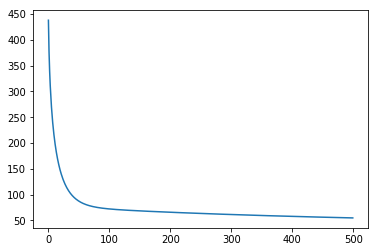

In [7]:

# train Adagrad
l_rate = 0.01
repeat = 500

costs_ada=[]
w_ada = np.zeros(len(x[0]))#10*1
s_grad=np.zeros(len(x[0]))

for i in range(repeat):
    tem=np.dot(x,w_ada)
    loss=tem-y    
    cost=(1/(2*m))*np.sum((loss**2))
    costs_ada.append(cost)
    grad=np.dot(x.T,loss)
    s_grad+=grad**2
    ada=(np.sqrt(s_grad)+1e-8)
    w_ada=w_ada-l_rate*grad/ada
    

np.save("model.npy",w_ada)
print(costs_ada[-1])
plt.plot(np.arange(repeat),costs_ada)

#### Nesterov Momentum:  
$v_t= \gamma v_t+ \eta \nabla_{\boldsymbol{\theta}}J(\theta -\gamma v_{t-1}) $  
$\theta = \theta - v_t$

#### GD with Momentum:
$v_t= \gamma v_t+ \eta \nabla_{\boldsymbol{\theta}}J(\theta) $  
$\theta = \theta - v_t$

22.074835998674143


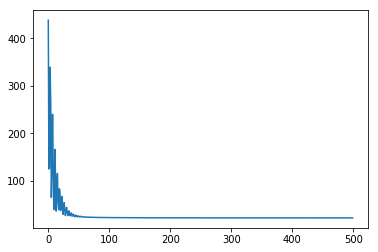

In [8]:
#train GDM  
l_rate = 0.0001
repeat = 500

r=0.9
v_w=0
costs_nm = []
w_nm = np.zeros(len(x[0])) 

for i in range(repeat):
    y_p=np.dot(x,w_nm)
    cost=(1/(2*m))*np.sum((y_p-y) ** 2)
    costs_nm.append(cost)
    
    grad_w=(1/m)*np.dot(x.T,(y_p-y))
    v_w=r*v_w+l_rate*grad_w 
    w_nm=w_nm-v_w 
 
np.save("model.npy",w_nm)
 
print(costs_nm[-1])
plt.plot(np.arange(repeat),costs_nm)


#### Adam:  

$m_t=\beta_1 m_{t-1}+(1-\beta_1)g_t$  
$v_t=\beta_2 v_{t-1}+(1-\beta_2)g_t^2 $  
$ \hat{m}_t = \frac {m_t} {1-\beta_1^t} $    
$ \hat{v}_t = \frac {v_t} {1-\beta_2^t} $  
$ \theta_{t+1} = \theta_t -\frac {\eta} {\sqrt{v_t +\epsilon}} \hat{m}_t $
 

150.16973165874853


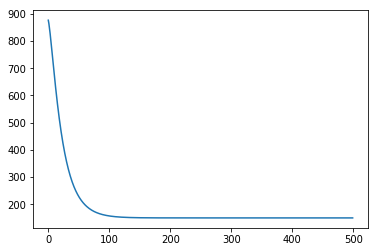

In [9]:
# Adam 

l_rate=0.001
repeat=500

m_w,m_b,v_w,v_b=0,0,0,0 
p1=0.9
p2=0.999
e=1e-8

costs_adam = []
w_adam = np.zeros(len(x[0])) 
#Train Adam    
for i in range(repeat):
    y_p=np.dot(x,w_adam)
    cost=(1/m)*np.sum(((y_p-y)**2))
    costs_adam.append(cost)
    
    d_w=(2/m)*np.sum(np.dot(x.T,(y_p-y))) 
    
    m_w=m_w*p1+(1-p1)*d_w
    v_w=v_w*p2+(1-p2)*(d_w**2)
    m_w_t=m_w/(1-p1)
    v_w_t=v_w/(1-p2)
    w_adam=w_adam-l_rate*m_w_t/(np.sqrt(v_w_t)+e)
     
    
np.save("model.npy",w_adam)
plt.plot(np.arange(repeat), costs_adam)
print(costs_adam[-1])

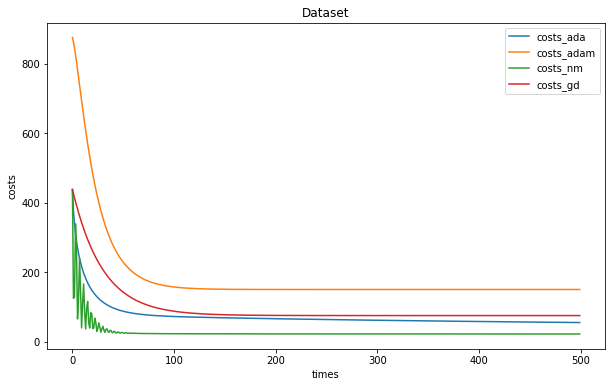

In [34]:

fig = plt.figure(figsize=(10,6)) 
plt.plot(np.arange(repeat), costs_ada, label='costs_ada')
plt.plot(np.arange(repeat), costs_adam, label='costs_adam')
plt.plot(np.arange(repeat), costs_nm, label='costs_nm')
plt.plot(np.arange(repeat), costs_gd, label='costs_gd')

legend = plt.legend(loc='best')
plt.title("Dataset")
plt.xlabel("times")
plt.ylabel("costs")
plt.show()

In [32]:
# model=np.load("model.npy")
test=pd.read_csv("test.csv")
t=test[test["testmaterial"]=="PM2.5"]
t.drop(["date","testmaterial"],axis=1,inplace=True)

t=np.array(t,float) #240*9
t=np.concatenate((np.ones((t.shape[0],1)),t), axis=1)#240*10
res=[]
res=np.dot(t,w_gd)
print(res)

[ 28.41726154  65.05156257  27.61838271  47.36210257  12.43968477
  29.90089367  54.43788657  19.40134322  65.96456696  18.37421329
  34.12353896  43.13945728  57.51927638  30.92802361  65.39393922
  21.79797974  49.3022369   37.66143096  17.11883226  15.17869793
   6.73340735  21.11322645  39.60156528  49.53048799  52.95425444
  20.08609651  19.05896658  18.71658993  21.68385419  16.66233006
  14.49394464   9.35829497  20.9991009   31.49865135  30.35739587
  37.09080322  36.06367328  31.72690245   2.16838542  27.8466338
  26.47712722  42.91120619  45.65021935  27.16188051  17.34708335
  56.60627199  58.77465741  46.44909819  31.27040025  16.20582787
  46.79147483  28.53138709  28.18901045  26.93362942  35.1506689
  36.06367328  30.12914477  31.1562747   32.41165574  49.87286464
  10.613676    47.01972593  32.63990683  43.25358283  41.19932296
  30.92802361  39.03093754  48.16098141  32.75403238  45.87847044
  63.2255538   59.6876618   50.10111573   5.82040297  16.31995342
  52.9542544

#  =======Tutorial=========

In [22]:
import sys
import numpy as np
import pandas as pd
import csv


# train=pd.read_csv("train.csv");
# raw_data = np.genfromtxt(sys.argv[1], delimiter=',') ## train.csv
raw_data = np.genfromtxt("train.csv", delimiter=',') ## train.csv
data = raw_data[1:,3:]
where_are_NaNs = np.isnan(data)
data[where_are_NaNs] = 0 

month_to_data = {}  ## Dictionary (key:month , value:data)                                  

for month in range(12):
    sample = np.empty(shape = (18 , 480))
    for day in range(20):
        for hour in range(24): 
            sample[:,day * 24 + hour] = data[18 * (month * 20 + day): 18 * (month * 20 + day + 1),hour]
    month_to_data[month] = sample  


In [23]:
# preprocess
x = np.empty(shape = (12 * 471 , 18 * 9),dtype = float)
y = np.empty(shape = (12 * 471 , 1),dtype = float)

for month in range(12): 
    for day in range(20): 
        for hour in range(24):   
            if day == 19 and hour > 14:
                continue  
            x[month * 471 + day * 24 + hour,:] = month_to_data[month][:,day * 24 + hour : day * 24 + hour + 9].reshape(1,-1) 
            y[month * 471 + day * 24 + hour,0] = month_to_data[month][9 ,day * 24 + hour + 9]
            
            
# normalization
mean = np.mean(x, axis = 0) 
std = np.std(x, axis = 0)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if not std[j] == 0 :
            x[i][j] = (x[i][j]- mean[j]) / std[j]

#### Adagrad: 
 
$\theta_{t+1,i}=\theta_{t,i}-\frac {\eta} {\sqrt{G_{t,ii}+\epsilon}} g_{t,i}$  

#### loss:
$L_w=\sqrt{\frac {{(WX-Y)}^2} {n}} $

In [33]:
# training 
dim = x.shape[1] + 1 
w = np.zeros(shape = (dim, 1 ))
x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
learning_rate = np.array([[200]] * dim)
adagrad_sum = np.zeros(shape = (dim, 1 ))
 
for T in range(10000):
    if(T % 1000 == 0 ):
        print("T=",T)
        print("Loss:",np.power(np.sum(np.power(x.dot(w) - y, 2 ))/ x.shape[0],0.5))
    gradient = (-2) * np.transpose(x).dot(y-x.dot(w))
    adagrad_sum += gradient ** 2
    w = w - learning_rate * gradient / (np.sqrt(adagrad_sum) + 0.0005)

np.save('weight.npy',w)     ## save weight

T= 0
Loss: 27.071214829194115
T= 1000
Loss: 9.957336253580264
T= 2000
Loss: 6.861485712171389
T= 3000
Loss: 6.060560050269414
T= 4000
Loss: 5.819427069726108
T= 5000
Loss: 5.737251324218732
T= 6000
Loss: 5.70629462196756
T= 7000
Loss: 5.693596789769688
T= 8000
Loss: 5.687956629045994
T= 9000
Loss: 5.685243884510883


In [30]:
w = np.load('weight.npy')                                   ## load weight
test_raw_data = np.genfromtxt("test.csv", delimiter=',')   ## test.csv
test_data = test_raw_data[:, 2: ]
where_are_NaNs = np.isnan(test_data)
test_data[where_are_NaNs] = 0 


test_x = np.empty(shape = (240, 18 * 9),dtype = float)

for i in range(240):
    test_x[i,:] = test_data[18 * i : 18 * (i+1),:].reshape(1,-1) 

##Normalization
for i in range(test_x.shape[0]):        
    for j in range(test_x.shape[1]):
        if not std[j] == 0 :
            test_x[i][j] = (test_x[i][j]- mean[j]) / std[j]

test_x = np.concatenate((np.ones(shape = (test_x.shape[0],1)),test_x),axis = 1).astype(float)
answer = test_x.dot(w)

with open("final.csv","w") as f:
    w = csv.writer(f)
    title = ['id','value']
    w.writerow(title) 
    for i in range(240):
        content = ['id_'+str(i),answer[i][0]]
        w.writerow(content) 